In [344]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import *
np.random.seed(34)
X_MAX = 20
Y_MAX = 20

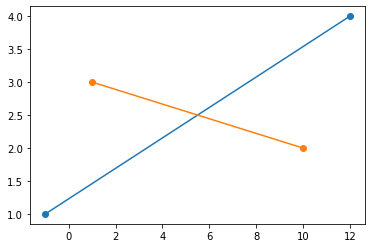

Decimal('14285714285714285714.28571429')

In [348]:
xx=[[1,1],[1,2],[1,3],[1,3]]
xx = set(tuple(element) for element in xx)
xx = list(xx)
xx
x1, y1 = [-1, 12], [1, 4]
x2, y2 = [1, 10], [3, 2]
plt.plot(x1, y1, x2, y2, marker = 'o')
plt.show()
Decimal(1e20) / Decimal(7)

In [375]:
points = generate_points(num_to_generate = 30,  x_max = X_MAX, y_max = Y_MAX)
# print(points)
temp_triangles = []
st = super_triangle(x_max = X_MAX, y_max = Y_MAX)
temp_triangles.append(st)
temp_triangles
triangles = []

for point in points:
    edge_buffer = []
#     for triangle in temp_triangles:
    to_remove = []
    for i in range(len(temp_triangles)):
        triangle = temp_triangles[i]
        circle = define_circle(triangle[0:2], triangle[2:4], triangle[4:6])
        cx, cy, radius = circle[0], circle[1], circle[2]
        pos = (position_to_circle(point, cx, cy, radius))
        if pos == 'right':
            triangles.append(triangle)
            to_remove.append(triangle)
        elif pos == 'in' or pos == 'log':
            add_edge(edge_buffer, triangle[0], triangle[1], triangle[2],triangle[3])
            add_edge(edge_buffer, triangle[0], triangle[1], triangle[4],triangle[5])
            add_edge(edge_buffer, triangle[4], triangle[5], triangle[2],triangle[3])
            to_remove.append(triangle)
    for triangle in to_remove:
        temp_triangles.remove(triangle)
        
    # remove deplicate edges
#     print("Before:", edge_buffer)
    edge_buffer = set(tuple(element) for element in edge_buffer)
    edge_buffer = list(edge_buffer)
#     print("After:", edge_buffer)
    
    # make triangles to temp
#     print(edge_buffer)
    for edge in edge_buffer:
        temp_triangles.append([point[0], point[1], edge[0], edge[1], edge[2], edge[3]])
    
triangles.extend(temp_triangles)
# print("Temp", temp_triangles)
# print(triangles)
triangles = triangles_filter(triangles, st, points)
# print(triangles)
draw_triangles(triangles)

IndexError: tuple index out of range

In [365]:
def generate_points(num_to_generate, x_max, y_max):
#     x = np.random.uniform(0, x_max, num_to_generate).reshape(-1, 1)
#     y = np.random.uniform(0, y_max, num_to_generate).reshape(-1, 1)
    x = np.random.randint(0, x_max, size=(num_to_generate,1))
    y = np.random.randint(0, y_max, size=(num_to_generate,1))
    points = np.concatenate((x,y), axis = 1)
    points = points[points[:,0].argsort()]
    return points


def super_triangle(x_max, y_max):
    sup = [-30*x_max, -10*y_max, 10*x_max, 30*y_max, 40*x_max, -10 *y_max]
    return sup

def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))

# def iteration(points, temp_triangles):
#     for point in points:
#         edge_buffer = {}


def add_edge(edge_buffer, x1, y1, x2, y2):
    if x1 > x2:
        add_edge(edge_buffer, x2, y2, x1, y1)
        return
    edge_buffer.append([x1, y1, x2, y2])


def define_circle(p1, p2, p3):
    """
    Returns the center and radius of the circle passing the given 3 points.
    In case the 3 points form a line, returns (None, infinity).
    """
    
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    cx = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    cy = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    radius = np.sqrt((cx - p1[0])**2 + (cy - p1[1])**2)
    return [cx, cy, radius]


def position_to_circle(point, cx, cy, radius):
    # right
    if cx+radius < point[0]:
        return 'right'
    
    elif (point[0]-cx)**2 + (point[1]-cy)**2 > radius**2:
        return 'out'
    
    elif (point[0]-cx)**2 + (point[1]-cy)**2 - radius**2 < 1e-10 and (point[0]-cx)**2 + (point[1]-cy)**2 - radius**2 > -1*1e-10:
        return 'log'
    
    else:
        return 'in'
    
    return ''

def triangles_filter(triangles, super_triangle, points):
    res = []
    for triangle in triangles:
        in_st = False #whether the triangle is related with super triangle
        contain_point = False
        for x in triangle:
            if x in super_triangle:
                in_st = True
                break
       
        if not in_st:
#             print(triangle)
            circle = define_circle(triangle[0:2], triangle[2:4], triangle[4:6])
            cx, cy, radius = circle[0], circle[1], circle[2]
            for point in points:
                # detect whether there is a point in this triangle's circle
                pos = (position_to_circle(point, cx, cy, radius))
                if pos is 'in':
                    contain_point = True
                    break
            if not contain_point:
                res.append(triangle)
    
    return res

def draw_triangles(triangles):
    x = []
    y = []
    for triangle in triangles:
        x.extend([triangle[0], triangle[2], triangle[4]])
        y.extend([triangle[1],triangle[3], triangle[5]])
        x1, y1 = [triangle[0], triangle[2]], [triangle[1], triangle[3]]
        x2, y2 = [triangle[0], triangle[4]], [triangle[1], triangle[5]]
        x3, y3 = [triangle[2], triangle[4]], [triangle[3], triangle[5]]
#         x4, y4 = [triangle[0], triangle[2], triangle[4], triangle[0]], [triangle[1], triangle[3], triangle[5], triangle[1]]
#         plt.plot(x1, y1, x2, y2, x3, y3, marker = 'o')
        plt.plot(x1, y1, x2, y2, x3, y3)
#         plt.plot(x4, y4)
#         line = plt.Line2D((triangle[0], triangle[1]), (triangle[2], triangle[3]), lw=2.5)
#         line = plt.Line2D((triangle[0], triangle[1]), (triangle[4], triangle[5]), lw=2.5)
#         line = plt.Line2D((triangle[4], triangle[5]), (triangle[2], triangle[3]), lw=2.5)
#         plt.gca().add_line(line)
    plt.scatter(x,y)
    plt.show()
